# Implementation of GD

Recall the previous results from the derivatives of the OLS

$$ \nabla C_{\text{OLS}}(\beta) = \frac{2}{n} X^T(X\beta - y) \;\;\;\;\;\;\;\;\;\;\;\; H = \frac{2}{n} X^T X$$

and Ridge

$$ \nabla C_{\text{Rid}}(\beta) = \frac{2}{n} X^T(X\beta - y) + 2\lambda\beta \;\;\;\;\;\;\;\;\;\;\;\; H = \frac{2}{n} X^T X+2\lambda I$$

With these results we implement the own gradient descend using a cubic polynomial.


Analytical OLS - betas:  [ 1.00816038 -1.99125602  0.49349941  0.69763874]
Own implemt GD - betas:  [ 1.00815486 -1.9826221   0.493502    0.69456562]




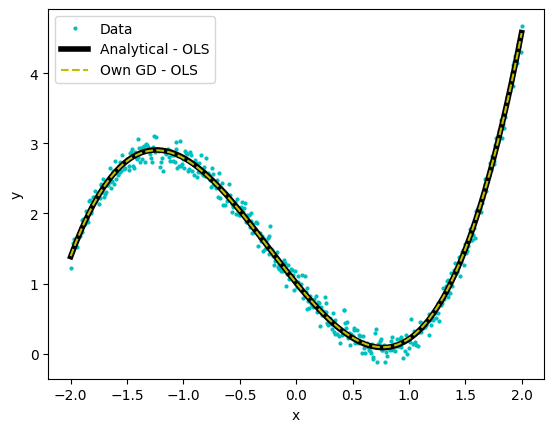

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

#Make dataset - cubic polynomial
np.random.seed(100)
n = 500
x = np.linspace(-2, 2, n)
y = 1 - 2*x + 0.5*x**2 + 0.7*x**3 + np.random.normal(0, 0.1, n)

#Functions to perform OLS and Ridge
def design_matrix(x, degree):
    X = np.ones((len(x), degree+1))
    for i in range(1, degree+1):
        X[:, i] = x**i
    return X

def hessian_matrix_ols(X):
    return (2 / X.shape[0]) * (X.T @ X)

def hessian_matrix_ridge(X, lambda_):
    return (2 / X.shape[0]) * (X.T @ X) + 2 * lambda_ * np.eye(X.shape[1])

def OLS(X, y):
    betas_ols = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ betas_ols
    return betas_ols, y_pred, mean_squared_error(y, y_pred), r2_score(y, y_pred)

def Ridge_regression(X, y, lambda_):
    betas_ridge = np.linalg.inv(X.T @ X + lambda_*np.eye(X.shape[1])) @ X.T @ y
    y_pred = X @ betas_ridge
    return betas_ridge, y_pred, mean_squared_error(y, y_pred), r2_score(y, y_pred)

#Analytical optimization
X = design_matrix(x, 3)
H = hessian_matrix_ols(X)
eigen_vals, eigen_vecs = np.linalg.eigh(H)
betas_ols, _, _, _ = OLS(X, y)

#Parameters for own GD
eta = 1 / np.max(eigen_vals)
betas_own_gd = np.random.rand(4)
num_iters = 300

#Run iterations
for i in range(num_iters):
    gradient = (2/n) * X.T @ (X @ betas_own_gd - y)
    betas_own_gd = betas_own_gd - eta * gradient

print("Analytical OLS - betas: ", betas_ols)
print("Own implemt GD - betas: ", betas_own_gd)
print("\n")

#Plotting
plt.plot(x, y, "co", ms=2, label='Data')
plt.plot(x, X @ betas_ols, "k-", lw=4, label='Analytical - OLS')
plt.plot(x, X @ betas_own_gd, "y--", label='Own GD - OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Lambda: 1e-07
Analytical Ridge - betas:  [ 1.00816038 -1.99125602  0.49349941  0.69763874]
Own implement GD - betas:  [ 1.00816019 -1.99102502  0.49349947  0.69755652]


Lambda: 1e-06
Analytical Ridge - betas:  [ 1.00816037 -1.991256    0.49349941  0.69763873]
Own implement GD - betas:  [ 1.00815857 -1.99099065  0.49350001  0.69754429]


Lambda: 1e-05
Analytical Ridge - betas:  [ 1.00816034 -1.99125581  0.49349942  0.69763867]
Own implement GD - betas:  [ 1.0081423  -1.9909307   0.49350538  0.69752296]


Lambda: 0.0001
Analytical Ridge - betas:  [ 1.00816002 -1.99125393  0.49349953  0.697638  ]
Own implement GD - betas:  [ 1.00797966 -1.98998017  0.4935591   0.69718473]


Lambda: 0.001
Analytical Ridge - betas:  [ 1.00815676 -1.99123516  0.4935006   0.69763132]
Own implement GD - betas:  [ 1.00635743 -1.9806531   0.49409447  0.69386585]


Lambda: 0.01
Analytical Ridge - betas:  [ 1.00812423 -1.99104739  0.49351135  0.6975645 ]
Own implement GD - betas:  [ 0.99053518 -1.89198608  0.4992

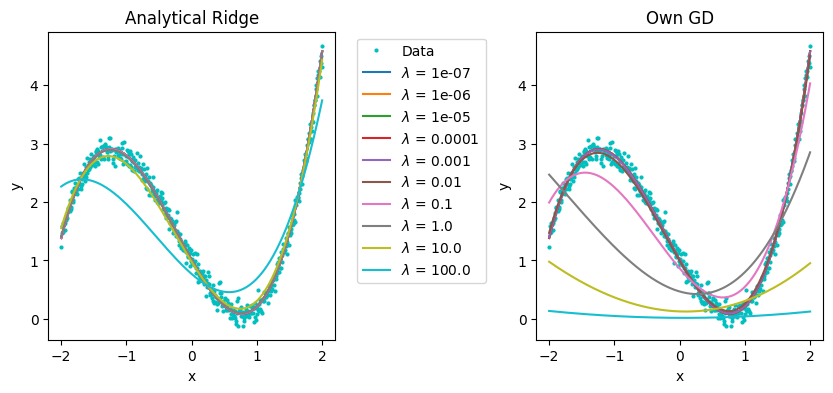

We see that the analytical expressions converge quite well for all values of Lambda.
However, for the number of iterations of OLS, the beta values obtained by Gradient Descent deviate from the expected values.


In [26]:
#Ridge implementation

#Define lambdas space
lambdas = np.logspace(-7, 2, 10)
results = np.zeros((len(lambdas), 4))
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(x, y, "co", ms=2, label='Data')
axs[1].plot(x, y, "co", ms=2, label='Data')


for i, lambda_ in enumerate(lambdas):

    #Analytical optimization
    X = design_matrix(x, 3)
    H = hessian_matrix_ridge(X, lambda_)
    eigen_vals, eigen_vecs = np.linalg.eig(H)
    betas_ridge, _, _, _ = Ridge_regression(X, y, lambda_)

    #Parameters for own GD
    eta = 1 / np.max(eigen_vals)
    betas_own_gd = np.random.rand(4)
    num_iters = 500

    #Run iterations
    for k in range(num_iters):
        gradient = (2/n) * X.T @ (X @ betas_own_gd - y) + 2 * lambda_ * betas_own_gd
        betas_own_gd = betas_own_gd - eta * gradient

    #Store and print results
    results[i] = betas_own_gd
    axs[0].plot(x, X @ betas_ridge, label=f'$\lambda$ = {lambda_}')
    axs[1].plot(x, X @ betas_own_gd, label=f'$\lambda$ = {lambda_}')
    print(f"Lambda: {lambda_}")
    print("Analytical Ridge - betas: ", betas_ridge)
    print("Own implement GD - betas: ", betas_own_gd)
    print("\n")

#Plotting
axs[0].set_title('Analytical Ridge')
axs[1].set_title('Own GD')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend(loc='upper center', bbox_to_anchor=(-0.4, 1))

plt.subplots_adjust(wspace=0.7)
plt.show()

print("We see that the analytical expressions converge quite well for all values of Lambda.")
print("However, for the number of iterations of OLS, the beta values obtained by Gradient Descent deviate from the expected values.")

## Adding momentum



We will include momentum to the process of minimization of the cost function.



Matrix inversion betas - OLS:  [ 1.00816038 -1.99125602  0.49349941  0.69763874]
Gradient Descend betas - OLS:  [ 1.00815486 -1.9826221   0.493502    0.69456562]
GD w/ momentum betas γ = 0.0:  [ 1.00815486 -1.9826221   0.493502    0.69456562]
GD w/ momentum betas γ = 0.2:  [ 1.00816009 -1.98920721  0.49349954  0.6969095 ]
GD w/ momentum betas γ = 0.4:  [ 1.00816038 -1.99108811  0.49349941  0.69757898]
GD w/ momentum betas γ = 0.6:  [ 1.00816038 -1.99125546  0.49349941  0.69763854]
GD w/ momentum betas γ = 0.8:  [ 1.00816038 -1.99125602  0.49349941  0.69763874]
GD w/ momentum betas γ = 1.0:  [ 0.79507143 -3.86264048  0.78811212  2.39655908]




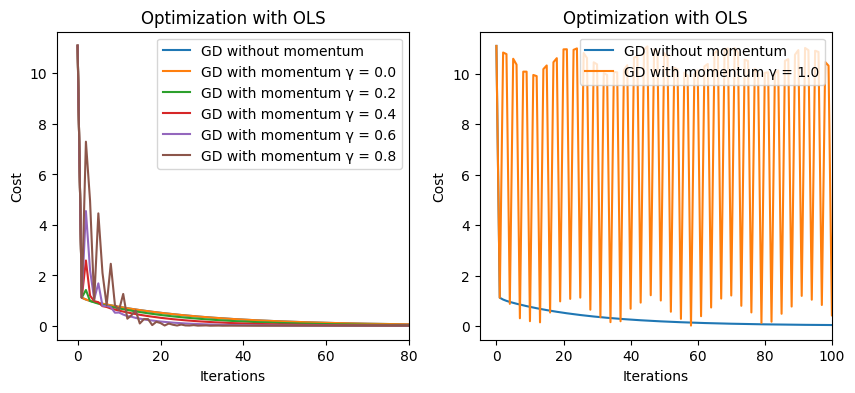

In the plots we can see that for values of γ greater or equal to 1, the optimization process does not converge.
Lower values produces decent results compared to the analytical expressions.
Despite that, the highest value of γ between [0, 0.2, 0.4, 0.6, 0.8] produces the faster converge.
Since we have found that the optimal momentum rate is 0.8, it will be used for the Ridge regression with hyperparameters λ.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

#Dataset - again
np.random.seed(100)
n = 500
x = np.linspace(-2, 2, n)
y = 1 - 2*x + 0.5*x**2 + 0.7*x**3 + np.random.normal(0, 0.1, n)

#Define cost function
def cost_function(betas):
    return np.mean((X @ betas - y)**2)

#Analytical results
X = design_matrix(x, 3)
betas_ols, _, _, _ = OLS(X, y)
print("Matrix inversion betas - OLS: ", betas_ols)

#Random initial values
init_vals = np.random.rand(4)
init_vals_momentum = init_vals.copy()

#Previous GD - without momentum
betas_own_gd = init_vals
cost_vals = [cost_function(betas_own_gd)]
num_iters = 300
eta = 1 / np.max(np.linalg.eigvals(hessian_matrix_ols(X)))

#Run optimization iterations
for i in range(num_iters):
    gradient = (2/n) * X.T @ (X @ betas_own_gd - y)
    betas_own_gd -= eta * gradient
    cost_vals.append(cost_function(betas_own_gd))
print("Gradient Descend betas - OLS: ", betas_own_gd)

#Adding momentum
gammas = np.linspace(0, 1, 6)
cost_vals_momentum = np.zeros((len(gammas), num_iters+1))

for i, gamma in enumerate(gammas):
    beta_momentum = init_vals_momentum.copy()
    delta_beta = 0
    cost_vals_momentum[i, 0] = cost_function(beta_momentum)

    #Run optimization iterations
    for k in range(num_iters):
        gradient = (2/n) * X.T @ (X @ beta_momentum - y)
        delta_beta = gamma * delta_beta + eta * gradient
        beta_momentum -= delta_beta
        cost_vals_momentum[i, k+1] = cost_function(beta_momentum)

    print(f"GD w/ momentum betas \u03B3 = {gamma.round(3)}: ", beta_momentum)
print("\n")


#Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(cost_vals, label='GD without momentum')
for i, gamma in enumerate(gammas[:-1]):
    ax[0].plot(cost_vals_momentum[i], label=f"GD with momentum \u03B3 = {gamma.round(3)}")
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Cost')
ax[0].set_title("Optimization with OLS")
ax[0].set_xlim(-5,80)
ax[0].legend()

ax[1].plot(cost_vals, label='GD without momentum')
ax[1].plot(cost_vals_momentum[-1], label=f"GD with momentum \u03B3 = {gammas[-1].round(3)}")
ax[1].set_xlabel('Iterations')
ax[1].set_title("Optimization with OLS")
ax[1].set_ylabel('Cost')
ax[1].set_xlim(-5,100)
ax[1].legend(loc="upper right")

plt.show()

print("In the plots we can see that for values of \u03B3 greater or equal to 1, the optimization process does not converge.")
print("Lower values produces decent results compared to the analytical expressions.")
print("Despite that, the highest value of \u03B3 between [0, 0.2, 0.4, 0.6, 0.8] produces the faster converge.")
print("Since we have found that the optimal momentum rate is 0.8, it will be used for the Ridge regression with hyperparameters \u03BB.")

Analytical results:
Matrix inversion betas - Ridge λ=1e-06:  [ 1.00816037 -1.991256    0.49349941  0.69763873]
Matrix inversion betas - Ridge λ=1e-05:  [ 1.00816034 -1.99125581  0.49349942  0.69763867]
Matrix inversion betas - Ridge λ=0.0001:  [ 1.00816002 -1.99125393  0.49349953  0.697638  ]
Matrix inversion betas - Ridge λ=0.001:  [ 1.00815676 -1.99123516  0.4935006   0.69763132]
Matrix inversion betas - Ridge λ=0.01:  [ 1.00812423 -1.99104739  0.49351135  0.6975645 ]
Matrix inversion betas - Ridge λ=0.1:  [ 1.00779905 -1.98917171  0.49361875  0.69689707]
Matrix inversion betas - Ridge λ=1.0:  [ 1.00456366 -1.97060775  0.49468535  0.69029142]
Matrix inversion betas - Ridge λ=10.0:  [ 0.97376509 -1.80242588  0.50464473  0.63044865]


Gradient Descend results:
Gradient Descend betas - Ridge λ=1e-06:  [ 1.00814958 -1.98196532  0.49350422  0.69433185]
Gradient Descend betas - Ridge λ=1e-05:  [ 1.00813331 -1.98187421  0.4935096   0.69429943]
Gradient Descend betas - Ridge λ=0.0001:  [ 1.0

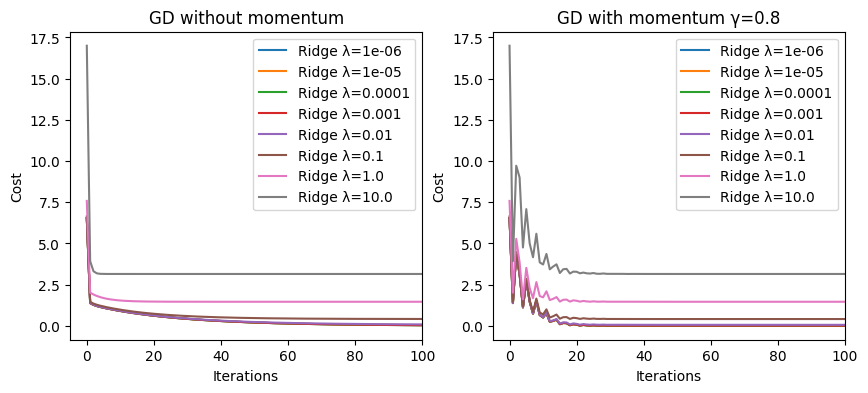

In [28]:
### Ridge regression
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

#Define cost function
def cost_function(betas, lambda_):
    return np.mean((X @ betas - y)**2) + lambda_ * np.sum(betas**2)

#Analytical results
print("Analytical results:")
lambdas = np.logspace(-6, 1, 8)
X = design_matrix(x, 3)
for lambda_ in lambdas:
    betas_ridge, _, _, _ = Ridge_regression(X, y, lambda_)
    print(f"Matrix inversion betas - Ridge \u03BB={lambda_}: ", betas_ridge)
print("\n")

#Random initial values
init_vals = np.random.rand(4)
init_vals_momentum = init_vals.copy()
num_iters = 300

#Previous GD - without momentum
print("Gradient Descend results:")
for lambda_ in lambdas:
    eta = 1 / np.max(np.linalg.eigvals(hessian_matrix_ridge(X, lambda_)))
    betas_own_gd = init_vals.copy()
    cost_vals = [cost_function(betas_own_gd, lambda_)]

    #Run optimization iterations
    for i in range(num_iters):
        gradient = (2/n) * X.T @ (X @ betas_own_gd - y) + 2 * lambda_ * betas_own_gd
        betas_own_gd -= eta * gradient
        cost_vals.append(cost_function(betas_own_gd, lambda_))
    ax[0].plot(cost_vals, label=f"Ridge \u03BB={lambda_}")
    print(f"Gradient Descend betas - Ridge \u03BB={lambda_}: ", betas_own_gd)
print("\n")

#Adding momentum
gamma = 0.8

print("Gradient Descend with momentum \u03B3=0.8:")
for lambda_ in lambdas:
    eta = 1 / np.max(np.linalg.eigvals(hessian_matrix_ridge(X, lambda_)))
    beta_momentum = init_vals_momentum.copy()
    delta_beta = 0
    cost_vals_momentum = [cost_function(beta_momentum, lambda_)]

    #Run optimization iterations
    for k in range(num_iters):
        gradient = (2/n) * X.T @ (X @ beta_momentum - y) + 2 * lambda_ * beta_momentum
        delta_beta = gamma * delta_beta + eta * gradient
        beta_momentum -= delta_beta
        cost_vals_momentum.append(cost_function(beta_momentum, lambda_))
    ax[1].plot(cost_vals_momentum, label=f"Ridge \u03BB={lambda_}")
    print(f"GD with momentum betas - Ridge \u03BB={lambda_}: ", beta_momentum)
print("\n")

#Plotting
ax[0].set_xlabel('Iterations')
ax[0].set_title("GD without momentum")
ax[0].set_ylabel('Cost')
ax[0].set_xlim(-5,100)
ax[0].legend()

ax[1].set_xlabel('Iterations')
ax[1].set_title("GD with momentum \u03B3=0.8")
ax[1].set_ylabel('Cost')
ax[1].set_xlim(-5,100)
ax[1].legend(loc="upper right")

plt.show()

# Stochastic gradient descend

Now, since we have already implemented the analytical derivatives, we work here with the automatic differentiation library AutoGrad. Additionally, the gradients will be evaluated and updated with several batches from the original dataset. Here we consider only Ridge regression. OLS will appear as a particular case when $\lambda \to 0$ or $\lambda = 0$. In this code we will construct a general function SGD that depends of all the tunable parameters and return the cost function minimization and beta values per epoch. This will become useful when looping over the set of variable parameters.

Analytical results:
Matrix inversion betas - Ridge λ=1e-05:  [ 1.00816034 -1.99125581  0.49349942  0.69763867]




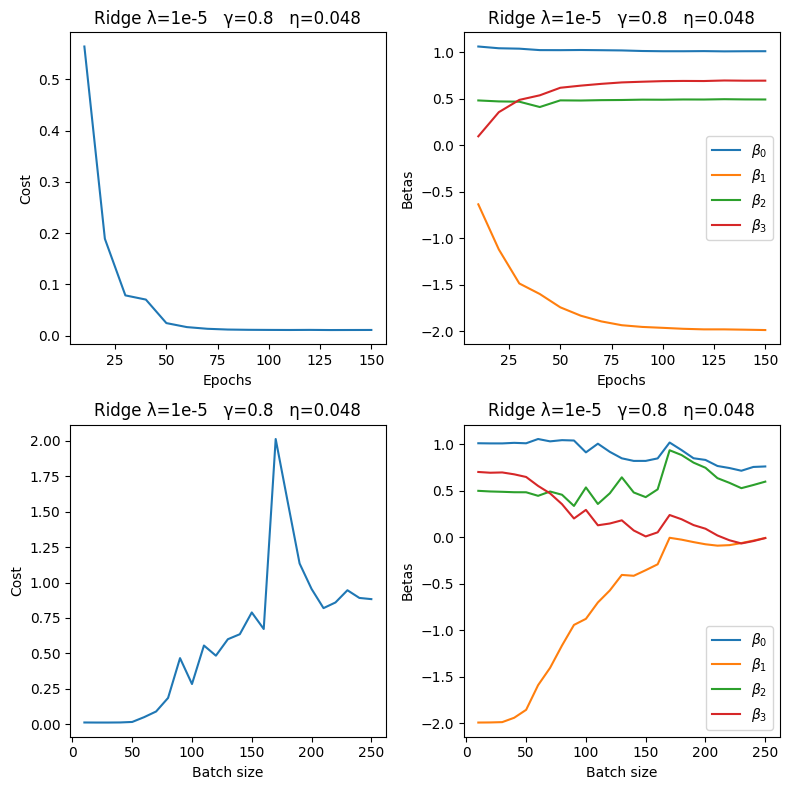

We can see that the addition of momentum and batches splitting to the data set also produces a convergence of the optimial parameters
However, the batch size has to be low enough. Otherwise, optimal convergence is not reached.


In [7]:
###SGD
import numpy as np
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

#Dataset - again
np.random.seed(100)
n = 500
x = np.linspace(-2, 2, n)
y = 1 - 2*x + 0.5*x**2 + 0.7*x**3 + np.random.normal(0, 0.1, n)

#Analytical results
print("Analytical results:")
X = design_matrix(x, 3)
lambda_ = 1e-5
betas_ridge, _, _, _ = Ridge_regression(X, y, lambda_)
print(f"Matrix inversion betas - Ridge \u03BB={lambda_}: ", betas_ridge)
print("\n")

#SGD function
def SGD(eta, gamma, lambda_, num_epochs, batch_size, init_vals, X, y):

    #Define cost function
    def cost_function(X, y, betas, lambda_):
        return np.mean((X @ betas - y)**2) + lambda_*np.sum(betas**2)

    beta_momentum = init_vals.copy()
    num_minbatches = int(len(y)/batch_size)
    m, M = num_minbatches, batch_size

    delta_beta = 0.0
    cost_vals_epochs = []
    betas_epochs = []

    #Run optimization
    for epoch in range(num_epochs):
        for i in range(num_minbatches):
            random_index = M*np.random.randint(m)
            Xi = X[random_index:random_index+M]
            yi = y[random_index:random_index+M]
            gradients = (1.0/M)*grad(cost_function, argnum=2)(Xi, yi, beta_momentum, lambda_)

            delta_beta = eta*gradients + gamma*delta_beta
            beta_momentum -= delta_beta

        cost_vals_epochs.append(cost_function(X, y, beta_momentum, lambda_))
        betas_epochs.append(beta_momentum)
    return cost_vals_epochs, betas_epochs

#Plotting
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
init_vals = np.random.rand(4)



### Number of epochs analysis
epoch_list = np.arange(10, 151, 10)
betas_epochs = np.zeros((len(epoch_list), 4))
cost_epochs = []

for k, epoch in enumerate(epoch_list):
    cost_vals, betas = SGD(1/np.max(np.linalg.eigvals(hessian_matrix_ridge(X, 0))), 0.8, 1e-5, epoch, 30, init_vals.copy(), X, y)
    betas_epochs[k] = betas[-1]
    cost_epochs.append(cost_vals[-1])

ax[0, 0].plot(epoch_list, cost_epochs)
ax[0, 0].set_xlabel('Epochs')
ax[0, 0].set_ylabel('Cost')
ax[0, 0].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.8   \u03B7={np.round(1/np.max(np.linalg.eigvals(hessian_matrix_ridge(X, 0))), 3)}')

ax[0, 1].plot(epoch_list, betas_epochs[:, 0], label=r"$\beta_0$")
ax[0, 1].plot(epoch_list, betas_epochs[:, 1], label=r"$\beta_1$")
ax[0, 1].plot(epoch_list, betas_epochs[:, 2], label=r"$\beta_2$")
ax[0, 1].plot(epoch_list, betas_epochs[:, 3], label=r"$\beta_3$")
ax[0, 1].set_xlabel('Epochs')
ax[0, 1].set_ylabel('Betas')
ax[0, 1].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.8   \u03B7={np.round(1/np.max(np.linalg.eigvals(hessian_matrix_ridge(X, 0))), 3)}')
ax[0, 1].legend()




### Batch_size analysis
batch_size_list = np.arange(10, 251, 10)
betas_batchs = np.zeros((len(batch_size_list), 4))
cost_batchs = []

for k, batch_size in enumerate(batch_size_list):
    cost_vals, betas = SGD(1/np.max(np.linalg.eigvals(hessian_matrix_ridge(X, 0))), 0.8, 1e-5, 150, batch_size, init_vals.copy(), X, y)
    betas_batchs[k] = betas[-1]
    cost_batchs.append(cost_vals[-1])

ax[1, 0].plot(batch_size_list, cost_batchs)
ax[1, 0].set_xlabel('Batch size')
ax[1, 0].set_ylabel('Cost')
ax[1, 0].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.8   \u03B7={np.round(1/np.max(np.linalg.eigvals(hessian_matrix_ridge(X,0))), 3)}')

ax[1, 1].plot(batch_size_list, betas_batchs[:, 0], label=r"$\beta_0$")
ax[1, 1].plot(batch_size_list, betas_batchs[:, 1], label=r"$\beta_1$")
ax[1, 1].plot(batch_size_list, betas_batchs[:, 2], label=r"$\beta_2$")
ax[1, 1].plot(batch_size_list, betas_batchs[:, 3], label=r"$\beta_3$")
ax[1, 1].set_xlabel('Batch size')
ax[1, 1].set_ylabel('Betas')
ax[1, 1].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.8   \u03B7={np.round(1/np.max(np.linalg.eigvals(hessian_matrix_ridge(X, 0))), 3)}')
ax[1, 1].legend()

plt.tight_layout()
plt.show()


print("We can see that the addition of momentum and batches splitting to the data set also produces a convergence of the optimial parameters")
print("However, the batch size has to be low enough. Otherwise, optimal convergence is not reached.")

# AdaGrad optimization

Here we include the Adaptative Gradient algorithm taken from Goodfellow, Bengio and Courville. The implementation is similar as before except we accumulate the gradients in the variable $r$

$$ r ← r + \text{grad} \odot \text{grad}$$

and then update the parameters as

$$ \Delta \beta = - \frac{\eta}{\delta + \sqrt{r}} \; \text{grad}$$

$$ \beta ← \beta + \Delta \beta $$

where $\eta$ is the global learning rate, $\delta$ is a constant for numerical stabiliy, normally chosen in the order of $10^{-7}$. In the code we will follow this notation.

Analytical results:
Matrix inversion betas - Ridge λ=1e-05:  [ 1.00816034 -1.99125581  0.49349942  0.69763867]




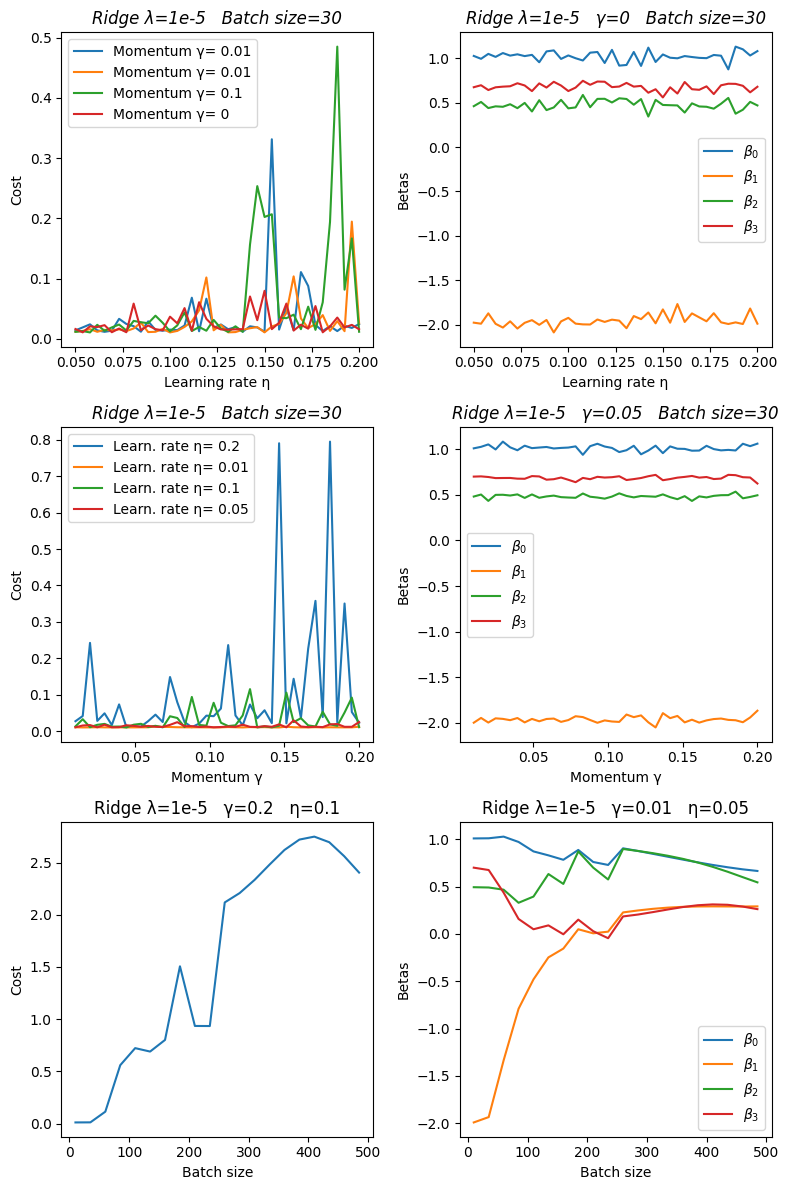

For this algorithm we have a lot of tunable parameters. From the images we can see that the lowest values of learning rate and momentum
produce better convergence. 
Again, the batch size has to be low enough. Otherwise, optimal convergence is not reached.


In [8]:
import numpy as np
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

#Dataset - again
np.random.seed(100)
n = 500
x = np.linspace(-2, 2, n)
y = 1 - 2*x + 0.5*x**2 + 0.7*x**3 + np.random.normal(0, 0.1, n)

#Analytical results
print("Analytical results:")
X = design_matrix(x, 3)
lambda_ = 1e-5
betas_ridge, _, _, _ = Ridge_regression(X, y, lambda_)
print(f"Matrix inversion betas - Ridge \u03BB={lambda_}: ", betas_ridge)
print("\n")

#AdaGRad - SGD function
def AdaGra_SGD(eta, gamma, lambda_, num_epochs, batch_size, init_vals, X, y, delta = 1e-7):

    #Define cost function
    def cost_function(X, y, betas, lambda_):
        return np.mean((X @ betas - y)**2) + lambda_*np.sum(betas**2)

    beta_momentum = init_vals.copy()
    num_minbatches = int(len(y)/batch_size)
    m, M = num_minbatches, batch_size

    delta_beta = 0.0
    cost_vals_epochs = []
    betas_epochs = []

    #Run optimization
    for epoch in range(num_epochs):
        r = np.zeros(4)
        for i in range(num_minbatches):
            random_index = M*np.random.randint(m)
            Xi = X[random_index:random_index+M]
            yi = y[random_index:random_index+M]
            gradients = (1.0/M)*grad(cost_function, argnum=2)(Xi, yi, beta_momentum, lambda_)

            r += gradients**2
            delta_beta = eta*gradients/(delta + np.sqrt(r)) + gamma*delta_beta
            beta_momentum -= delta_beta

        cost_vals_epochs.append(cost_function(X, y, beta_momentum, lambda_))
        betas_epochs.append(beta_momentum)
    return cost_vals_epochs, betas_epochs


#Plotting
fig, ax = plt.subplots(3, 2, figsize=(8, 12))
init_vals = np.random.rand(4)
num_epochs = 500


### Learning rate eta analysis
lr_list = np.linspace(0.05, 0.2, 40)

for momtm in [0.01, 0.01, 0.1, 0]:
    betas_epochs = np.zeros((len(lr_list), 4))
    cost_epochs = []
    for k, lr in enumerate(lr_list):
        cost_vals, betas = AdaGra_SGD(lr, momtm, 1e-5, num_epochs, 30, init_vals.copy(), X, y)
        betas_epochs[k] = betas[-1]
        cost_epochs.append(cost_vals[-1])
    ax[0, 0].plot(lr_list, cost_epochs, label = f"Momentum \u03B3= {momtm}")

ax[0, 0].set_xlabel('Learning rate \u03B7')
ax[0, 0].set_ylabel('Cost')
ax[0, 0].set_title(f'Ridge \u03BB=1e-5   Batch size=30', style='italic')
ax[0, 0].legend()

ax[0, 1].plot(lr_list, betas_epochs[:, 0], label=r"$\beta_0$")
ax[0, 1].plot(lr_list, betas_epochs[:, 1], label=r"$\beta_1$")
ax[0, 1].plot(lr_list, betas_epochs[:, 2], label=r"$\beta_2$")
ax[0, 1].plot(lr_list, betas_epochs[:, 3], label=r"$\beta_3$")
ax[0, 1].set_xlabel('Learning rate \u03B7')
ax[0, 1].set_ylabel('Betas')
ax[0, 1].set_title(f'Ridge \u03BB=1e-5   \u03B3=0   Batch size=30', style='italic')
ax[0, 1].legend()




### Momentum gamma analysis
momentum_list = np.linspace(0.01, 0.2, 40)

for lr in [0.2, 0.01, 0.1, 0.05]:
    betas_epochs = np.zeros((len(momentum_list), 4))
    cost_epochs = []
    for k, momtm in enumerate(momentum_list):
        cost_vals, betas = AdaGra_SGD(lr, momtm, 1e-5, num_epochs, 30, init_vals.copy(), X, y)
        betas_epochs[k] = betas[-1]
        cost_epochs.append(cost_vals[-1])
    ax[1, 0].plot(momentum_list, cost_epochs, label = f"Learn. rate \u03B7= {lr}")

ax[1, 0].set_xlabel('Momentum \u03B3')
ax[1, 0].set_ylabel('Cost')
ax[1, 0].set_title(f'Ridge \u03BB=1e-5   Batch size=30', style='italic')
ax[1, 0].legend(loc="upper left")

ax[1, 1].plot(momentum_list, betas_epochs[:, 0], label=r"$\beta_0$")
ax[1, 1].plot(momentum_list, betas_epochs[:, 1], label=r"$\beta_1$")
ax[1, 1].plot(momentum_list, betas_epochs[:, 2], label=r"$\beta_2$")
ax[1, 1].plot(momentum_list, betas_epochs[:, 3], label=r"$\beta_3$")
ax[1, 1].set_xlabel('Momentum \u03B3')
ax[1, 1].set_ylabel('Betas')
ax[1, 1].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.05   Batch size=30', style='italic')
ax[1, 1].legend(loc="center left")



# Batch size analysis
batch_size_list = np.arange(10, len(y)+1, 25)
betas_batchs = np.zeros((len(batch_size_list), 4))
cost_batchs = []

for k, batch_size in enumerate(batch_size_list):
    cost_vals, betas = SGD(0.05, 0.01, 1e-5, num_epochs, batch_size, init_vals.copy(), X, y)
    betas_batchs[k] = betas[-1]
    cost_batchs.append(cost_vals[-1])

ax[2, 0].plot(batch_size_list, cost_batchs)
ax[2, 0].set_xlabel('Batch size')
ax[2, 0].set_ylabel('Cost')
ax[2, 0].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.2   \u03B7={0.1}')

ax[2, 1].plot(batch_size_list, betas_batchs[:, 0], label=r"$\beta_0$")
ax[2, 1].plot(batch_size_list, betas_batchs[:, 1], label=r"$\beta_1$")
ax[2, 1].plot(batch_size_list, betas_batchs[:, 2], label=r"$\beta_2$")
ax[2, 1].plot(batch_size_list, betas_batchs[:, 3], label=r"$\beta_3$")
ax[2, 1].set_xlabel('Batch size')
ax[2, 1].set_ylabel('Betas')
ax[2, 1].set_title(f'Ridge \u03BB=1e-5   \u03B3=0.01   \u03B7=0.05')
ax[2, 1].legend()


plt.tight_layout()
plt.show()

print("For this algorithm we have a lot of tunable parameters. From the images we can see that the lowest values of learning rate and momentum")
print("produce better convergence. ")
print("Again, the batch size has to be low enough. Otherwise, optimal convergence is not reached.")

# Adam and RMSprop

Now here, we explore these algorithms. In the RMSprop optimization we update the parameters as

$$ r ← \rho r + (1-\rho) \; \text{grad} \odot \text{grad}$$

and then

$$ \Delta \beta = - \frac{\eta}{\sqrt{\delta + r}} \; \text{grad}$$

$$ \beta ← \beta + \Delta \beta $$

where again $\eta$ is the global learning rate, $\delta$ is a constant for numerical stabiliy, normally chosen in the order of $10^{-7}$ and $\rho$ is a global decay rate. In the code we will follow this notation.



Analytical results:
Matrix inversion betas - Ridge λ=1e-06:  [ 1.00816037 -1.991256    0.49349941  0.69763873]
Matrix inversion betas - Ridge λ=1e-05:  [ 1.00816034 -1.99125581  0.49349942  0.69763867]
Matrix inversion betas - Ridge λ=0.0001:  [ 1.00816002 -1.99125393  0.49349953  0.697638  ]
Matrix inversion betas - Ridge λ=0.001:  [ 1.00815676 -1.99123516  0.4935006   0.69763132]
Matrix inversion betas - Ridge λ=0.01:  [ 1.00812423 -1.99104739  0.49351135  0.6975645 ]
Matrix inversion betas - Ridge λ=0.1:  [ 1.00779905 -1.98917171  0.49361875  0.69689707]
Matrix inversion betas - Ridge λ=1.0:  [ 1.00456366 -1.97060775  0.49468535  0.69029142]
Matrix inversion betas - Ridge λ=10.0:  [ 0.97376509 -1.80242588  0.50464473  0.63044865]




/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
<ipython-input-5-b49f4c119866>:47: RuntimeWarning: overflow encountered in square
  r = rho*r + (1-rho)*gradients**2
<ipython-input-5-b49f4c119866>:47: RuntimeWarning: invalid value encountered in multiply
  r = rho*r + (1-rho)*gradients**2
<ipython-input-5-b49f4c119866>:28: RuntimeWarning: overflow encountered in square
  return np.mean((X @ betas - y)**2) + lambda_*np.sum(betas**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


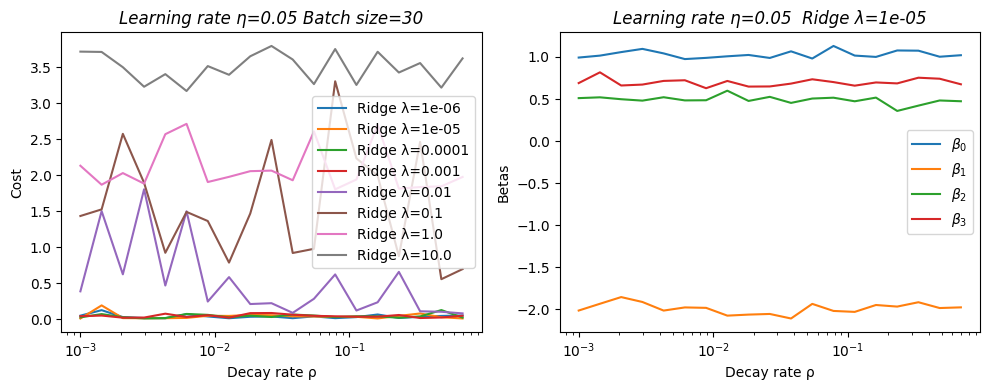

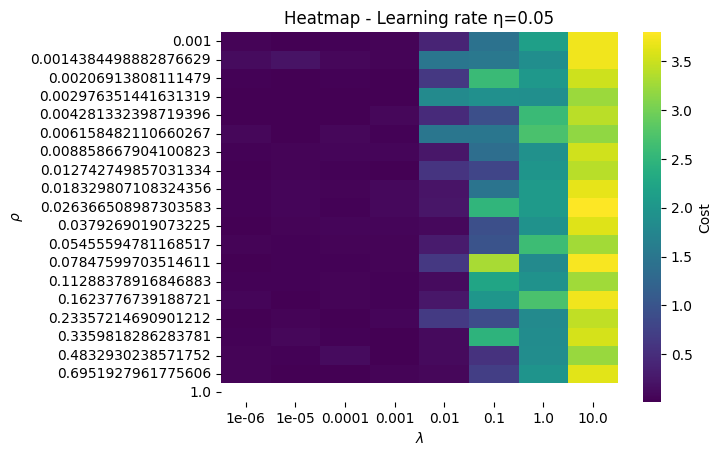

In [5]:
# RMSprop implementation
import numpy as np
from autograd import grad
import autograd.numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Dataset - again
np.random.seed(100)
n = 500
x = np.linspace(-2, 2, n)
y = 1 - 2*x + 0.5*x**2 + 0.7*x**3 + np.random.normal(0, 0.1, n)

#Analytical results
print("Analytical results:")
X = design_matrix(x, 3)
lambdas = np.logspace(-6, 1, 8)
for lambda_ in lambdas:
    betas_ridge, _, _, _ = Ridge_regression(X, y, lambda_)
    print(f"Matrix inversion betas - Ridge \u03BB={lambda_}: ", betas_ridge)
print("\n")

#AdaGRad - SGD function
def RMSprop_SGD(eta, rho, lambda_, num_epochs, batch_size, init_vals, X, y, delta = 1e-7):

    #Define cost function
    def cost_function(X, y, betas, lambda_):
        return np.mean((X @ betas - y)**2) + lambda_*np.sum(betas**2)

    betas = init_vals.copy()
    num_minbatches = int(len(y)/batch_size)
    m, M = num_minbatches, batch_size

    delta_beta = 0.0
    cost_vals_epochs = []
    betas_epochs = []

    #Run optimization
    for epoch in range(num_epochs):
        r = np.zeros(4)
        for i in range(num_minbatches):
            random_index = M*np.random.randint(m)
            Xi = X[random_index:random_index+M]
            yi = y[random_index:random_index+M]
            gradients = (1.0/M)*grad(cost_function, argnum=2)(Xi, yi, betas, lambda_)

            r = rho*r + (1-rho)*gradients**2
            delta_beta = eta*gradients/(np.sqrt(delta + r))
            betas -= delta_beta

        cost_vals_epochs.append(cost_function(X, y, betas, lambda_))
        betas_epochs.append(betas)
    return cost_vals_epochs, betas_epochs


#Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
init_vals = np.random.rand(4)
num_epochs = 250


### Decay rate analysis
decay_list = np.logspace(-3, 0, 20)
betas_epochs = np.zeros((len(decay_list), 4))
decay_lambdas = np.zeros((len(decay_list), len(lambdas)))

for j, lambda_ in enumerate(lambdas):
    cost_epochs = []
    for k, rho in enumerate(decay_list):
        cost_vals, betas = RMSprop_SGD(0.05, rho, lambda_, num_epochs, 30, init_vals.copy(), X, y)
        betas_epochs[k] = betas[-1]
        cost_epochs.append(cost_vals[-1])
        decay_lambdas[k, j] = cost_vals[-1]
    ax[0].plot(decay_list, cost_epochs, label = f"Ridge \u03BB={lambda_}")
    if j == 1:
        ax[1].set_title(f'Learning rate \u03B7=0.05  Ridge \u03BB={lambda_}', style='italic')
        ax[1].plot(decay_list, betas_epochs[:, 0], label=r"$\beta_0$")
        ax[1].plot(decay_list, betas_epochs[:, 1], label=r"$\beta_1$")
        ax[1].plot(decay_list, betas_epochs[:, 2], label=r"$\beta_2$")
        ax[1].plot(decay_list, betas_epochs[:, 3], label=r"$\beta_3$")


ax[0].set_xlabel('Decay rate \u03C1')
ax[0].set_ylabel('Cost')
ax[0].set_xscale('log')
ax[0].set_title(f'Learning rate \u03B7=0.05 Batch size=30', style='italic')
ax[0].legend()

ax[1].set_xscale('log')
ax[1].set_xlabel('Decay rate \u03C1')
ax[1].set_ylabel('Betas')
ax[1].legend()

plt.tight_layout()
plt.show()

sns.heatmap(decay_lambdas, xticklabels=lambdas, yticklabels=decay_list, cmap='viridis', cbar_kws={'label': 'Cost'})
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\rho$')
plt.title(f'Heatmap - Learning rate \u03B7=0.05')
plt.show()

Now in the Adam algorithm the updates are given by

$$ t ← t+1 $$

$$s ← \rho_1 s + (1-\rho_1)\; \text{grad}$$

$$r ← \rho_2 r + (1-\rho_2) \; \text{grad} ⊙ \text{grad}  $$

where all of the $r, s$ and $t$ are initialized to zero. And then the parameters are changed by

$$ s ← \frac{s}{1-\rho_1^t}  \qquad \qquad r ← \frac{r}{1-\rho_2^t}  $$

And the values

$$ \Delta β = - η \: \frac{s}{\sqrt{r} + δ}$$

$$β ← β+Δβ$$

Here in the code we use the suggested values in the book for $\rho_1, \rho_2$ and $δ$.

Analytical results:
Matrix inversion betas - Ridge λ=1e-06:  [ 1.00816037 -1.991256    0.49349941  0.69763873]
Matrix inversion betas - Ridge λ=1e-05:  [ 1.00816034 -1.99125581  0.49349942  0.69763867]
Matrix inversion betas - Ridge λ=0.0001:  [ 1.00816002 -1.99125393  0.49349953  0.697638  ]
Matrix inversion betas - Ridge λ=0.001:  [ 1.00815676 -1.99123516  0.4935006   0.69763132]
Matrix inversion betas - Ridge λ=0.01:  [ 1.00812423 -1.99104739  0.49351135  0.6975645 ]
Matrix inversion betas - Ridge λ=0.1:  [ 1.00779905 -1.98917171  0.49361875  0.69689707]
Matrix inversion betas - Ridge λ=1.0:  [ 1.00456366 -1.97060775  0.49468535  0.69029142]
Matrix inversion betas - Ridge λ=10.0:  [ 0.97376509 -1.80242588  0.50464473  0.63044865]




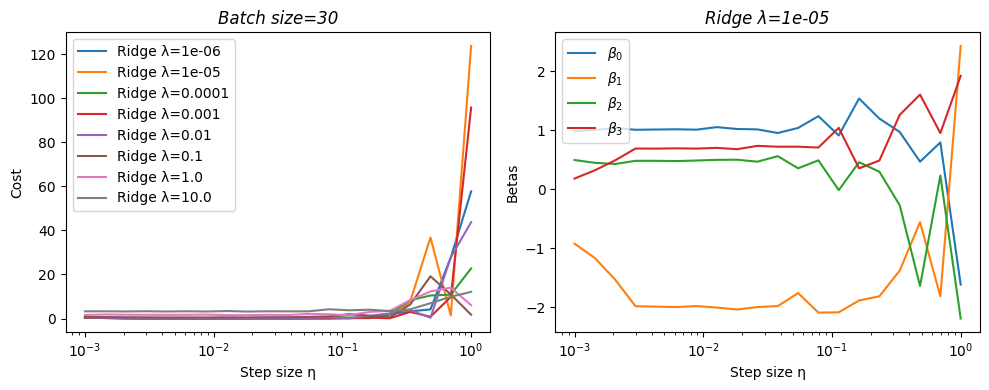

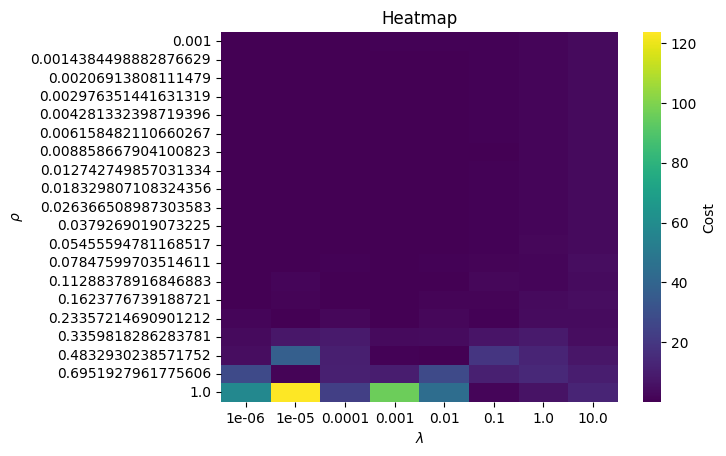

In [6]:
#ADAM implementation
import numpy as np
from autograd import grad
import autograd.numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Dataset - again
np.random.seed(100)
n = 500
x = np.linspace(-2, 2, n)
y = 1 - 2*x + 0.5*x**2 + 0.7*x**3 + np.random.normal(0, 0.1, n)

#Analytical results
print("Analytical results:")
X = design_matrix(x, 3)
lambdas = np.logspace(-6, 1, 8)
for lambda_ in lambdas:
    betas_ridge, _, _, _ = Ridge_regression(X, y, lambda_)
    print(f"Matrix inversion betas - Ridge \u03BB={lambda_}: ", betas_ridge)
print("\n")

#AdaGRad - SGD function
def Adam_SGD(eta, lambda_, num_epochs, batch_size, init_vals, X, y, delta = 1e-8, rho_1=0.9, rho_2=0.999):

    #Define cost function
    def cost_function(X, y, betas, lambda_):
        return np.mean((X @ betas - y)**2) + lambda_*np.sum(betas**2)

    betas = init_vals.copy()
    num_minbatches = int(len(y)/batch_size)
    m, M = num_minbatches, batch_size

    delta_beta = 0.0
    cost_vals_epochs = []
    betas_epochs = []

    #Run optimization
    for epoch in range(num_epochs):
        r = np.zeros(4)
        s = np.zeros(4)
        t = 0
        for i in range(num_minbatches):
            random_index = M*np.random.randint(m)
            Xi = X[random_index:random_index+M]
            yi = y[random_index:random_index+M]
            gradients = (1.0/M)*grad(cost_function, argnum=2)(Xi, yi, betas, lambda_)

            t += 1
            s = rho_1*s + (1-rho_1)*gradients
            r = rho_2*r + (1-rho_2)*gradients**2
            s_hat = s/(1-rho_1**t)
            r_hat = r/(1-rho_2**t)

            delta_beta = - eta*s_hat/(np.sqrt(r_hat) + delta)
            betas += delta_beta

        cost_vals_epochs.append(cost_function(X, y, betas, lambda_))
        betas_epochs.append(betas)
    return cost_vals_epochs, betas_epochs


#Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
init_vals = np.random.rand(4)
num_epochs = 250


### step size analysis
step_list = np.logspace(-3, 0, 20)
betas_epochs = np.zeros((len(step_list), 4))
step_lambdas = np.zeros((len(step_list), len(lambdas)))

for j, lambda_ in enumerate(lambdas):
    cost_epochs = []
    for k, eta in enumerate(step_list):
        cost_vals, betas = Adam_SGD(eta, lambda_, num_epochs, 30, init_vals.copy(), X, y)
        betas_epochs[k] = betas[-1]
        cost_epochs.append(cost_vals[-1])
        step_lambdas[k, j] = cost_vals[-1]
    ax[0].plot(step_list, cost_epochs, label = f"Ridge \u03BB={lambda_}")
    if j == 1:
        ax[1].set_title(f'Ridge \u03BB={lambda_}', style='italic')
        ax[1].plot(step_list, betas_epochs[:, 0], label=r"$\beta_0$")
        ax[1].plot(step_list, betas_epochs[:, 1], label=r"$\beta_1$")
        ax[1].plot(step_list, betas_epochs[:, 2], label=r"$\beta_2$")
        ax[1].plot(step_list, betas_epochs[:, 3], label=r"$\beta_3$")


ax[0].set_xlabel('Step size \u03B7')
ax[0].set_ylabel('Cost')
ax[0].set_xscale('log')
ax[0].set_title(f'Batch size=30', style='italic')
ax[0].legend()

ax[1].set_xscale('log')
ax[1].set_xlabel('Step size \u03B7')
ax[1].set_ylabel('Betas')
ax[1].legend()

plt.tight_layout()
plt.show()

sns.heatmap(step_lambdas, xticklabels=lambdas, yticklabels=step_list, cmap='viridis', cbar_kws={'label': 'Cost'})
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\rho$')
plt.title(f'Heatmap')
plt.show()

From the Adam and RMSprop algorithms we can see from the heatmaps and the plots that the optimal values for the decay rate, learning rate and step sizes seem to be the lowest ones in the order from $10^{-3}$ to $10^{-1}$. The regularization parameter $\lambda$ from the Ridge regression was also important: lower values of $λ$ produced better results.

# Refs

In order to perform the own implementation for gradient descend and SGD, it was followed the Lectures Notes https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week39.html

For the AdaGrad, Adam and RMSprop it was followed the notation, suggested initial values and algorithmical procedure from the book: Ian Goodfellow, Yoshua Bengio, and Aaron Courville https://www.deeplearningbook.org/ Chapter 8.